<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/TP1.%20Laboratorio%20de%20estimaci%C3%B3n%20no-param%C3%A9trica/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1



## Preparativos


### Imports necesarios a lo largo del ejercicio

In [0]:
import h5py as h5
from scipy import signal as scsig
import numpy as np
import matplotlib.pyplot as plt
import readligo as rl

### Clonamos el repositorio de Github

In [7]:
#https://medium.com/@navan0/how-to-push-files-into-github-from-google-colab-379fd0077aa8
!git clone https://github.com/LuFernandez/PASA.git

Cloning into 'PASA'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 70 (delta 16), reused 55 (delta 11), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [22]:
!git init
!git config — global user.email “togonzalez@itba.edu.ar”
!git config — global user.name “taomasgonzalez”

Initialized empty Git repository in /content/.git/


## Lectura de datos

In [0]:
def read_data(path, name):
  strain, time, chan_dict = rl.loaddata(path, name)
  dt = time[1] - time[0]
  times = dt*np.array([i for i in range(len(strain))])
  return (strain, times, chan_dict)

fs = 4096
folder_path = "PASA/TP1. Laboratorio de estimación no-paramétrica/LIGO/"
# leemos los datos de Livingston
strain_l1, times_l1, chan_dict_l1 = read_data(path=folder_path+'L-L1_LOSC_4_V2-1126259446-32.hdf5', name='L1')

# leemos los datos de Hanford
strain_h1, time_h1, chan_dict_h1 = read_data(path=folder_path+'H-H1_LOSC_4_V2-1126259446-32.hdf5', name='H1')


## Visualización de datos

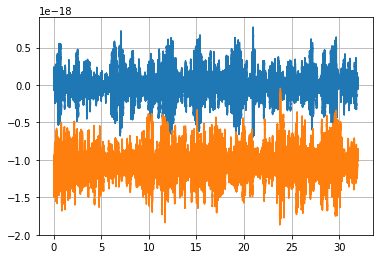

In [21]:
plt.plot(times_l1, strain_h1)
plt.plot(time_h1, strain_l1)
plt.grid()
plt.show()

PASA  __pycache__  readligo.py	sample_data


In [24]:
#!git add -
#!git commit -m “Meto el archivo Ejercicio1”

hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> PASA
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached PASA
hint: 
hint: See "git help submodule" for more information.
error: pathspec 'el' did not match any file(s) known to git.
error: pathspec 'archivo' did not match any file(s) known to git.
error: pathspec 'Ejercicio1”' did not match any file(s) known to git.


## a) Estimación del espectro de potencia del ruido mediante el uso de periodogramas

### Implementación del periodograma

In [0]:
def periodogram(fs, data, figure_number, y_lim, x_lim, title):
  #f, Pxx = scsig.periodogram(x=strain_l1, fs=fs)
  f, Pxx = scsig.periodogram(x=strain_l1, fs=fs)
  plt.figure(1)
  plt.loglog(f, Pxx)
  plt.ylim((10e-50, 1e-37))
  plt.xlim((20, 2000))
  plt.title("Periodograma")
  plt.grid()
  return (f, Pxx)

f_l1, Pxx_l1 = periodogram(fs=fs, data=strain_l1, figure_number=1, x_lim=(20, 2000), y_lim=(10e-50, 1e-37), title="Periodograma L1")
f_h1, Pxx_h1 = periodogram(fs=fs, data=strain_h1, figure_number=2, x_lim=(20, 2000), y_lim=(10e-50, 1e-37), title="Periodograma H1")

# f, Pxx = scsig.welch(x=strain_l1, window='boxcar', nperseg=len(strain_l1)//5, fs=fs)
# plt.figure(2)
# plt.loglog(f, Pxx)
# plt.ylim((1e-45, 1e-38))
# plt.xlim()
# plt.title("Welch-Bartlet")
# plt.grid()
# plt.show()

## b) Estimación 